In [1]:

from cartopy import config
import cartopy
import cartopy.crs as ccrs
import climtas
import cmocean
from collections import namedtuple
import dask.array
from datetime import datetime
import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import scipy.stats
from scipy import stats
from scipy.stats import ttest_ind 
import seaborn as sns
import sparse
from string import ascii_lowercase
import xarray as xr


import warnings
warnings.filterwarnings("ignore")
import netCDF4 as nc
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr    
import glob
import os
import cartopy.crs as ccrs
import matplotlib.colors as colors
import pandas as pd
import datetime
from matplotlib import colors
import pymannkendall as mk
from matplotlib.ticker import MaxNLocator

In [2]:
cmap2 = plt.cm.get_cmap("plasma_r", 15)

In [3]:



list2=[1,2,3,4,5,6]

#New Nino3.4 calculation 17May
nino_Access_filenames = []
nino_Access_filenames = sorted(glob.glob("/g/data/w97/sl7808/Nino34/4_detrend/*.nc")) 
file_name = []
f=[]
land_sea = xr.open_dataset("/g/data/w97/sl7808/landmask_accessESM1-5_AUS.nc").sftlf



for n in nino_Access_filenames:
    a = xr.open_dataset(n)
    
    dataout = np.empty(165,dtype=np.float64)
    start_year = 1850
    for yy in range(165):
        yr=yy+1850
        start_string = '%s-12-01' %(yr)
        end_string = '%s-02-28' %(yr+1)
        dataout[yy] = a.tos.sel(time=slice(start_string,end_string)).mean(dim='time') #sel DJF

    dm_new = xr.DataArray(
                    data   = dataout,
                    dims   = ['time'],
                    coords = {'time': np.arange(1850,2015)},
                    )
    
    sd=dm_new.sel(time=slice('1961','1990')).std(dim='time')
    nor_dm=dm_new/sd
    
    nor_dm.plot
    
    f.insert(-1,nor_dm)
    
nino=xr.concat(f, 'ensemble').sel(time=slice(1850,2013))
nino

<xarray.DataArray (ensemble: 20, time: 164)>
array([[-0.88225358, -0.21567213,  1.29090825, ..., -0.60366851,
        -0.05340292,  2.83334078],
       [ 0.79511251, -0.29925568,  0.55478174, ..., -0.95153469,
         1.11585396, -0.11034973],
       [-0.19218288,  0.7493613 , -0.36546519, ..., -1.06762315,
         0.28974434,  0.32573729],
       ...,
       [-1.01796375, -0.54519087,  2.19460138, ...,  1.69881908,
         0.40824488,  0.44519929],
       [ 0.57197435, -0.46572327, -0.76214227, ...,  0.55097781,
         0.18345768,  1.3897249 ],
       [-2.105748  ,  0.07455954, -2.15223142, ...,  1.04355497,
         0.71255869,  1.58617305]])
Coordinates:
  * time     (time) int64 1850 1851 1852 1853 1854 ... 2009 2010 2011 2012 2013
Dimensions without coordinates: ensemble

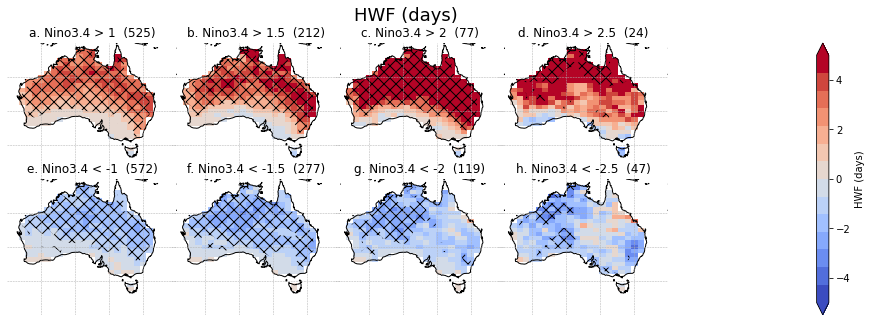

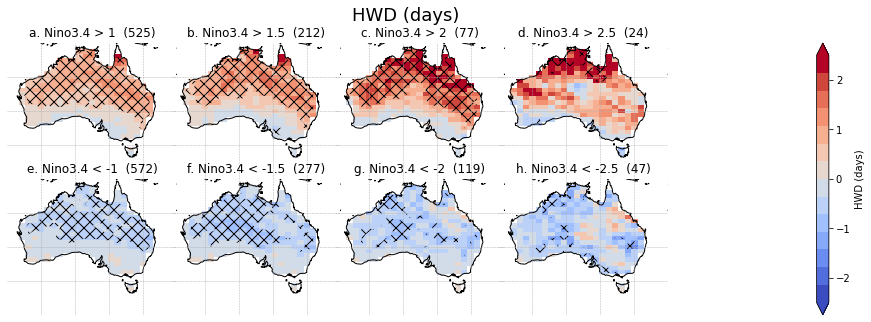

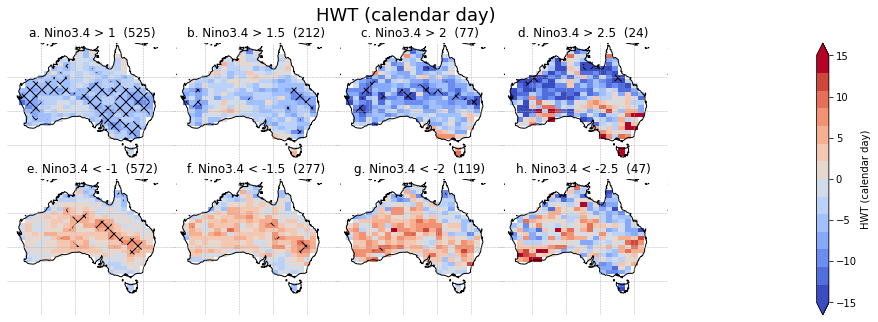

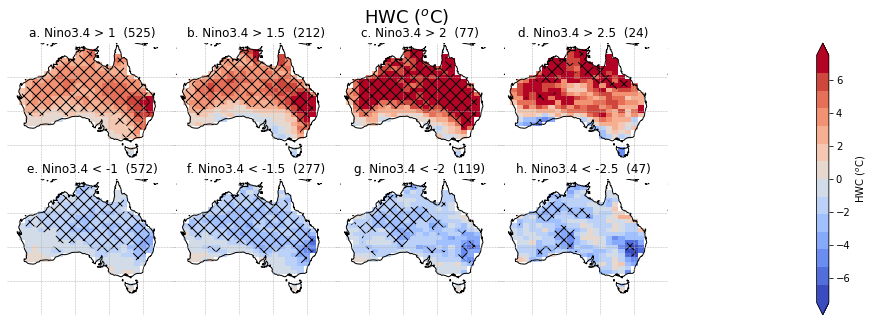

In [11]:
HWX_list =["HWF_EHF","HWD_EHF","HWT_EHF","HWC"]
HWX_list_2 =["HWF (days)","HWD (days)","HWT (calendar day)",'HWC ($^o$C)']

vmaxlist=[17.5,9,80,25]
vminlist=[5,3,40,5]
list2=[0,1,2,3,4,5]


nino_Access=nino

vmaxlist2=[5,2.5,15,7.5]
vminlist2=[-5,-2.5,-15,-7.5]







for (h,h2,xxx,nnn,xxx2,nnn2) in zip (HWX_list,HWX_list_2,vmaxlist,vminlist,vmaxlist2,vminlist2):

    #HWX

    fig, axes = plt.subplots(2,5, figsize=(15,5), subplot_kw={'projection': ccrs.PlateCarree(central_longitude=0)})

    

    for i in range(4):
        for j in range(2):
            axes[j,i].gridlines(ylocs=[-10,-20,-30,-40],draw_labels=False,
                       linewidth=0.5, linestyle='--', edgecolor='dimgrey')
            axes[j,i].axis('off')         
            axes[j,4].axis('off')         

    
    

    
    d = ("/g/data/w97/sl7808/ALLOUTPUT/EHF_year_ACCESS/by_HWX/"+h+".nc") 
    d1=xr.open_dataset(d, decode_times=False)
    HWA=d1[h]


    # plot
    
    
    #neutral_std
    g_neu=[]
    ggg_neu=[]
    c_neu1=0
    for i in range(20): 
        nino_sel=nino_Access.isel(ensemble=i)
        H1=HWA.isel(ensemble=i).where(land_sea>60)
        H4=H1.where(nino_sel<=1).where(nino_sel>=-1)
        g_neu.insert(-1,H4)

        ccc=H4.dropna(dim='time',how='all').time.count()
        c_neu1=c_neu1+ccc

    ggg_neu_std=xr.concat(g_neu, 'ensemble')  
    ggg_neu_std_stacked = ggg_neu_std.stack(ens_time=['time','ensemble'])
    ggg_neu_std_mean=ggg_neu_std.mean(dim=['ensemble','time'])

    
        
    plist=[1,1.5,2,2.5]
    
    nlist=[-1,-1.5,-2,-2.5]
    
    
    num=1
    abc=0
    for p,l2,n in zip (plist,list2,nlist):
        

        
        #positive
        g_pos=[]
        ggg_pos=[]
        c_pos1=0
        for i in range(20): 
            nino_sel=nino_Access.isel(ensemble=i)
            H1=HWA.isel(ensemble=i).where(land_sea>60)
            H4=H1.where(nino_sel>p)
            g_pos.insert(-1,H4)
            
            ccc=H4.dropna(dim='time',how='all').time.count()
            c_pos1=c_pos1+ccc
            
        ggg_pos=xr.concat(g_pos, 'ensemble')  
        axes[0,l2].set_title(' Nino3.4 > '+ str(p)+'  ('+str(c_pos1.values)+')', fontsize=12)
        

        
        
        #negative
        g_neg=[]
        ggg_neg=[]
        c_neg1=0
        for i in range(20): 
            nino_sel=nino_Access.isel(ensemble=i)
            H1=HWA.isel(ensemble=i).where(land_sea>60)
            H4=H1.where(nino_sel<n)
            g_neg.insert(-1,H4)
            
            ccc=H4.dropna(dim='time',how='all').time.count()
            c_neg1=c_neg1+ccc           
            
            
        ggg_neg=xr.concat(g_neg, 'ensemble')  
  
        
        
               
        
        #t-test
        
        ggg_pos_stacked = ggg_pos.stack(ens_time=['time','ensemble'])
        ggg_neg_stacked = ggg_neg.stack(ens_time=['time','ensemble'])
        
        
        r_pos = stats.ttest_ind(ggg_pos_stacked, ggg_neu_std_stacked, axis=2, equal_var=False, nan_policy='omit')
        p_value_pos = xr.DataArray(r_pos[1], dims=('lat', 'lon'), 
                          coords={'lat': ggg_pos['lat'],'lon': ggg_pos['lon']})

        

        r_neg = stats.ttest_ind(ggg_neg_stacked, ggg_neu_std_stacked, axis=2, equal_var=False, nan_policy='omit')
        p_value_neg = xr.DataArray(r_neg[1], dims=('lat', 'lon'), 
                          coords={'lat': ggg_pos['lat'],'lon': ggg_pos['lon']})        
        
        
        #plot
        cmap4=plt.cm.get_cmap("coolwarm", 14)
        
        
        ggg_pos_mean=ggg_pos.mean(dim=['ensemble','time'])
        ggg_pos_diff=ggg_pos_mean-ggg_neu_std_mean
        gplot=ggg_pos_diff.plot(ax=axes[0,l2],vmax=xxx2,vmin=nnn2,cmap=cmap4, add_colorbar=False, transform=ccrs.PlateCarree())
        p_value_pos.plot.contourf(ax=axes[0,l2],levels=[0.00, 0.05], hatches=['xx', None], colors='none', add_colorbar=False) 
        
        
        

        
        ggg_neg_mean=ggg_neg.mean(dim=['ensemble','time'])
        ggg_neg_diff=ggg_neg_mean-ggg_neu_std_mean
        ggg_neg_diff.plot(ax=axes[1,l2],vmax=xxx2,vmin=nnn2,cmap=cmap4, add_colorbar=False, transform=ccrs.PlateCarree())
        p_value_neg.plot.contourf(ax=axes[1,l2],levels=[0.00, 0.05], hatches=['xx', None], colors='none', add_colorbar=False) 
      
    
        axes[0,l2].set_title(ascii_lowercase[abc]+'. Nino3.4 > '+ str(p)+'  ('+str(c_pos1.values)+')', fontsize=12)
        abc2=abc+4
        axes[1,l2].set_title(ascii_lowercase[abc2]+'. Nino3.4 < '+ str(n)+'  ('+str(c_neg1.values)+')', fontsize=12)
        abc=abc+1

        
        
        jjlist=[0,1]
        jjlist_2=[0,1]
        for j,jj in zip (jjlist,jjlist_2):
            axes[j,l2].coastlines()
            axes[j,l2].set_ylim([-50, -10])
            axes[j,l2].set_xlim([ 110, 160])

        
        

        num=num+1

    fig.colorbar(gplot, ax=axes[:,4], orientation='vertical',extend='both',label=h2)
    fig.suptitle(h2, fontsize=18)
    fig.subplots_adjust(wspace=-0.1, hspace=0)
    


# Appendix

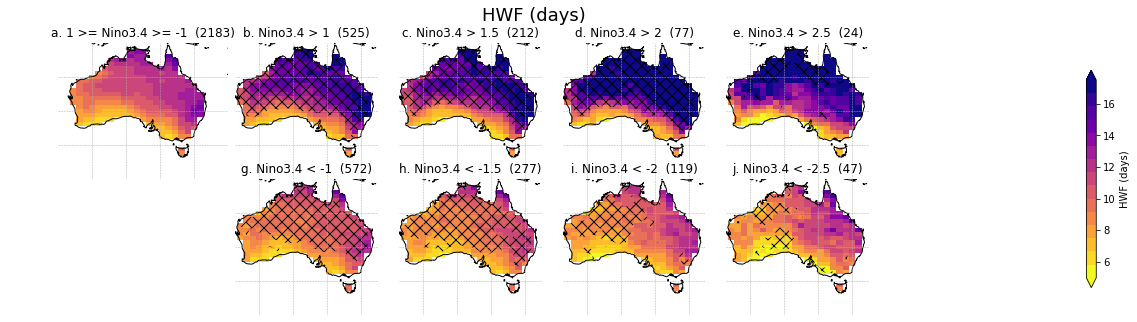

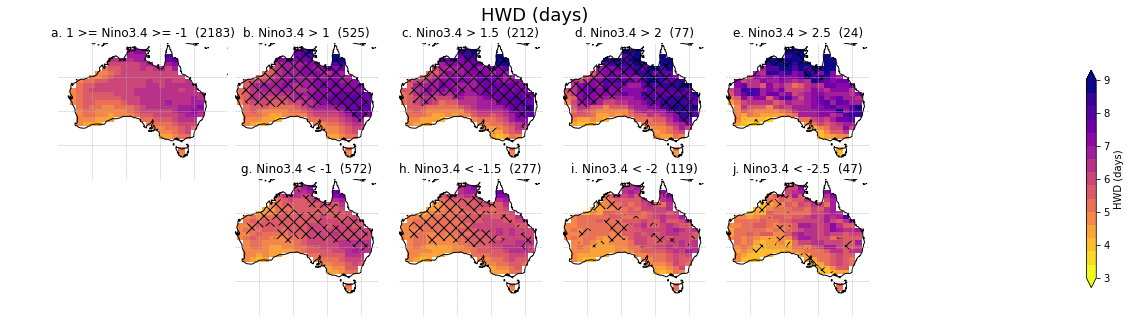

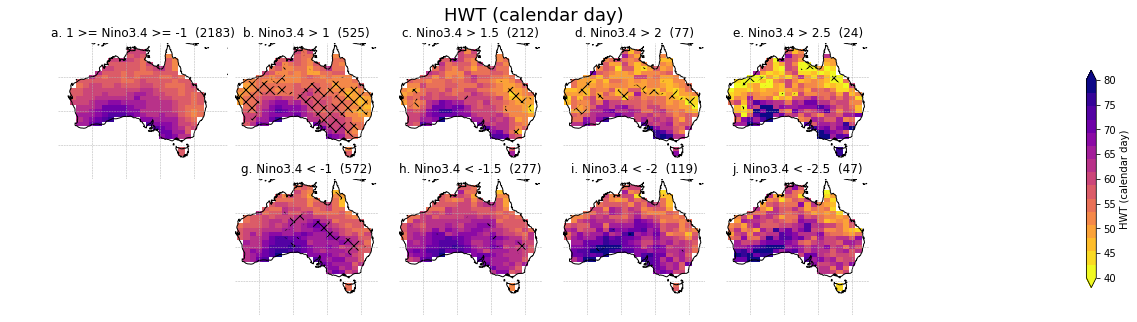

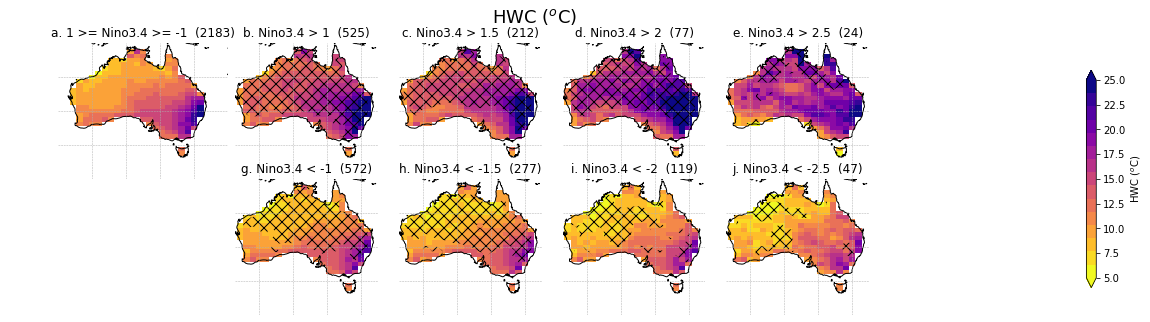

In [19]:

list2=[1,2,3,4,5]

HWX_list =["HWF_EHF","HWD_EHF","HWT_EHF","HWC"]
HWX_list_2 =["HWF (days)","HWD (days)","HWT (calendar day)",'HWC ($^o$C)']

abc=["a","b","c","d"]
vmaxlist=[17.5,9,80,25]
vminlist=[5,3,40,5]
llist=["b","c","d","e","f"]
llist2=["g","h","i","j","k"]


nino_Access=nino

for (h,h2,xxx,nnn,aaa) in zip (HWX_list,HWX_list_2,vmaxlist,vminlist,abc):
    #HWX

    fig, axes = plt.subplots(2,6, figsize=(20,5), subplot_kw={'projection': ccrs.PlateCarree(central_longitude=0)})

    

    for i in range(1,5):
        for j in range(2):
            axes[j,i].axis('off')         
            axes[j,i].gridlines(ylocs=[-10,-20,-30,-40],draw_labels=False,
                       linewidth=0.5, linestyle='--', edgecolor='dimgrey')
            axes[j,5].axis('off') 
            axes[j,0].axis('off') 


    

    axes[0,0].gridlines(ylocs=[-10,-20,-30,-40],draw_labels=False,
                       linewidth=0.5, linestyle='--', edgecolor='dimgrey')
    d = ("/g/data/w97/sl7808/ALLOUTPUT/EHF_year_ACCESS/by_HWX/"+h+".nc") 
    d1=xr.open_dataset(d, decode_times=False)
    HWA=d1[h]


    # plot
    
    
    #neutral_std
    g_neu=[]
    ggg_neu=[]
    c_neu1=0
    for i in range(20): 
        nino_sel=nino_Access.isel(ensemble=i)
        H1=HWA.isel(ensemble=i).where(land_sea>60)
        H4=H1.where(nino_sel<=1).where(nino_sel>=-1)
        g_neu.insert(-1,H4)

        ccc=H4.dropna(dim='time',how='all').time.count()
        c_neu1=c_neu1+ccc

    ggg_neu_std=xr.concat(g_neu, 'ensemble')  
    ggg_neu_std_stacked = ggg_neu_std.stack(ens_time=['time','ensemble'])

    ggg_neu_std.mean(dim=['ensemble','time']).plot(ax=axes[0,0],vmax=xxx,vmin=nnn,cmap=cmap2, add_colorbar=False, transform=ccrs.PlateCarree())
    axes[0,0].set_title('a. 1 >= Nino3.4 >= -1'+'  ('+str(c_neu1.values)+')', fontsize=12)
    axes[0,0].coastlines()
    axes[0,0].set_ylim([-50, -10])
    axes[0,0].set_xlim([ 110, 160])
    
    
        
    plist=[1,1.5,2,2.5]
    
    nlist=[-1,-1.5,-2,-2.5]
    
    
    num=1
    
    for p,l2,n,lll,lll2 in zip (plist,list2,nlist,llist,llist2):
        
        #print(p)
        
        #positive
        g_pos=[]
        ggg_pos=[]
        c_pos1=0
        for i in range(20): 
            nino_sel=nino_Access.isel(ensemble=i)
            H1=HWA.isel(ensemble=i).where(land_sea>60)
            H4=H1.where(nino_sel>p)
            g_pos.insert(-1,H4)
            
            ccc=H4.dropna(dim='time',how='all').time.count()
            c_pos1=c_pos1+ccc
            
        ggg_pos=xr.concat(g_pos, 'ensemble')  

        
        #negative
        g_neg=[]
        ggg_neg=[]
        c_neg1=0
        for i in range(20): 
            nino_sel=nino_Access.isel(ensemble=i)
            H1=HWA.isel(ensemble=i).where(land_sea>60)
            H4=H1.where(nino_sel<n)
            g_neg.insert(-1,H4)
            
            ccc=H4.dropna(dim='time',how='all').time.count()
            c_neg1=c_neg1+ccc           
            
            
        ggg_neg=xr.concat(g_neg, 'ensemble')  

               
        
        #t-test
        
        ggg_pos_stacked = ggg_pos.stack(ens_time=['time','ensemble'])
        ggg_neg_stacked = ggg_neg.stack(ens_time=['time','ensemble'])
        
        
        r_pos = stats.ttest_ind(ggg_pos_stacked, ggg_neu_std_stacked, axis=2, equal_var=False, nan_policy='omit')
        p_value_pos = xr.DataArray(r_pos[1], dims=('lat', 'lon'), 
                          coords={'lat': ggg_pos['lat'],'lon': ggg_pos['lon']})

        

        r_neg = stats.ttest_ind(ggg_neg_stacked, ggg_neu_std_stacked, axis=2, equal_var=False, nan_policy='omit')
        p_value_neg = xr.DataArray(r_neg[1], dims=('lat', 'lon'), 
                          coords={'lat': ggg_pos['lat'],'lon': ggg_pos['lon']})        
        
        
        #plot
        
        
        ggg_pos.mean(dim=['ensemble','time']).plot(ax=axes[0,l2],vmax=xxx,vmin=nnn,cmap=cmap2, add_colorbar=False, transform=ccrs.PlateCarree())
        p_value_pos.plot.contourf(ax=axes[0,l2],levels=[0.00, 0.05], hatches=['xx', None], colors='none', add_colorbar=False, transform=ccrs.PlateCarree()) 
        
        

        
        plott=ggg_neg.mean(dim=['ensemble','time']).plot(ax=axes[1,l2],vmax=xxx,vmin=nnn,cmap=cmap2, add_colorbar=False, transform=ccrs.PlateCarree())
        p_value_neg.plot.contourf(ax=axes[1,l2],levels=[0.00, 0.05], hatches=['xx', None], colors='none', add_colorbar=False, transform=ccrs.PlateCarree()) 
      
    
        axes[0,l2].set_title(lll+'. Nino3.4 > '+ str(p)+'  ('+str(c_pos1.values)+')', fontsize=12)
        axes[1,l2].set_title(lll2+'. Nino3.4 < '+ str(n)+'  ('+str(c_neg1.values)+')', fontsize=12)
        

        
        
        jjlist=[0,1,2,3,4]
        jjlist_2=[0,1]
        for j,jj in zip (jjlist,jjlist_2):
            axes[j,l2].coastlines()
            axes[j,l2].set_ylim([-50, -10])
            axes[j,l2].set_xlim([ 113, 155])
            axes[0,jj].set_xticks([ 120, 130, 140, 150], crs=ccrs.PlateCarree())
            axes[j,0].set_yticks([-40, -30, -20, -10], crs=ccrs.PlateCarree())



        num=num+1
    
    

    fig.colorbar(plott, ax=axes[:,5], orientation='vertical',extend='both',label=h2,shrink=0.8)

    fig.suptitle(h2, fontsize=18)
    fig.subplots_adjust(wspace=-0.45, hspace=0)
    
    


# Appendix

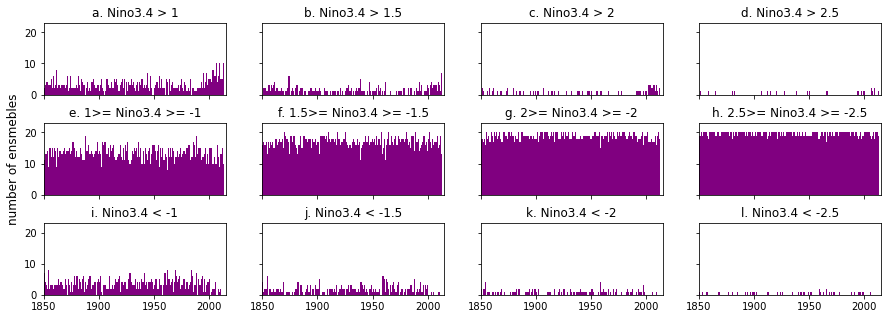

In [21]:

h="HWA_EHF"

fig, axes = plt.subplots(3,4, figsize=(15,5), sharey=True, sharex=True)




d = ("/g/data/w97/sl7808/ALLOUTPUT/EHF_year_ACCESS/by_HWX/"+h+".nc") 
d1=xr.open_dataset(d, decode_times=False)
HWA=d1[h]


# plot



list2=[0,1,2,3,4,5,6]
plist=[1,1.5,2,2.5]
nlist=[-1,-1.5,-2,-2.5]


num=1
abc_0=0
for p,l2,n in zip (plist,list2,nlist):


    #positive
    g_pos=[]
    ggg_pos=[]
    c_pos1=0
    for i in range(20): 
        nino_sel=nino_Access.isel(ensemble=i)
        H1=HWA.isel(ensemble=i).where(land_sea>60)
        H4=H1.where(nino_sel>p)
        
        ccc=H4.dropna(dim='time',how='all').time
        g_pos.insert(-1,ccc)


    ggg_pos=xr.concat(g_pos, dim='t')  
    ggg_pos.plot.hist(ax=axes[0,l2],bins=164,color='purple')
    axes[0,l2].set_xlim([1850, 2015])
    axes[0,l2].set_ylim([0, 23])





    #neutral
    g_neu=[]
    ggg_neu=[]
    c_neu1=0
    for i in range(20): 
        nino_sel=nino_Access.isel(ensemble=i)
        H1=HWA.isel(ensemble=i).where(land_sea>60)
        H4=H1.where(nino_sel<=p).where(nino_sel>=n)
        
        ccc=H4.dropna(dim='time',how='all').time
        g_neu.insert(-1,ccc)


    ggg_neu=xr.concat(g_neu, dim='t')  
    ggg_neu.plot.hist(ax=axes[1,l2],bins=164,color='purple')
    axes[1,l2].set_xlim([1850, 2015])
    axes[1,l2].set_ylim([0, 23])
    
    abc_1=abc_0+4
    axes[1,l2].set_title(ascii_lowercase[abc_1]+". "+str(p)+'>= Nino3.4 >= '+ str(n), fontsize=12)


  


    #negative
    g_neg=[]
    ggg_neg=[]
    c_neg1=0
    for i in range(20): 
        nino_sel=nino_Access.isel(ensemble=i)
        H1=HWA.isel(ensemble=i).where(land_sea>60)
        H4=H1.where(nino_sel<n)

        ccc=H4.dropna(dim='time',how='all').time
        g_neg.insert(-1,ccc)


    ggg_neg=xr.concat(g_neg, dim='t')  
    ggg_neg.plot.hist(ax=axes[2,l2],bins=164,color='purple')
    axes[2,l2].set_xlim([1850, 2015])
    axes[2,l2].set_ylim([0, 23])
    axes[2,l2].set_xlabel('', fontsize=8)        
        

    #plot
    axes[0,l2].set_xlabel('', fontsize=8)
    axes[1,l2].set_xlabel('', fontsize=8)
    axes[0,l2].set_title(ascii_lowercase[abc_0]+'. Nino3.4 > '+ str(p), fontsize=12)
    

    abc_2=abc_0+8
    axes[2,l2].set_title(ascii_lowercase[abc_2]+'. Nino3.4 < '+ str(n), fontsize=12)
    axes[1,0].set_ylabel('number of ensmebles', fontsize=12)

    abc_0=abc_0+1
    
fig.subplots_adjust(wspace=0.2, hspace=0.4)



